In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option('display.max_columns', None)



In [8]:
sentiment=pd.read_csv('fear_greed_index.csv')
trades=pd.read_csv('historical_data.csv')

In [9]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
def dataset_summary(df,name):
    print(f"\n====={name}====")
    print("Rows:",df.shape[0])
    print("Columns:",df.shape[1])
    print("\nMissing Values:\n",df.isnull().sum())
    print("\nDuplicated Rows:\n",df.duplicated().sum())

In [4]:
dataset_summary(sentiment,"sentiment Dataset")
dataset_summary(trades,"trades Dataset")


=====sentiment Dataset====
Rows: 2644
Columns: 4

Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicated Rows:
 0

=====trades Dataset====
Rows: 211224
Columns: 16

Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicated Rows:
 0


In [5]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [13]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
trades['Timestamp IST']=pd.to_datetime(trades['Timestamp IST'],format="%d-%m-%Y %H:%M")

In [15]:
trades['Time']=trades['Timestamp IST'].dt.time
trades['date']=trades['Timestamp IST'].dt.date

In [16]:
trades['date']=pd.to_datetime(trades['date'])

In [17]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,22:50:00,2024-12-02


In [19]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [24]:
daily_metrics = trades.groupby(["date","Account"]).agg(
    daily_pnl=("Closed PnL","sum"),
    trade_count=("Closed PnL","count"),
    avg_trade_size=("Size USD","mean"),
    long_ratio=("Side", lambda x: (x=="buy").mean())
).reset_index()

daily_metrics.head()


,date,Account,daily_pnl,trade_count,avg_trade_size,long_ratio
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,159.000000,0.0
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,9,5556.203333,0.0
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737,11,10291.213636,0.0
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034,2,5304.975000,0.0
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,3,5116.256667,0.0


In [27]:
merged = daily_metrics.merge(
    sentiment[["date","classification"]],
    on="date",
    how="left"
)
merged.rename(columns={"classification":"sentiment"}, inplace=True)
merged.head()

,date,Account,daily_pnl,trade_count,avg_trade_size,long_ratio,sentiment
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,159.000000,0.0,Greed
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,9,5556.203333,0.0,Extreme Greed
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737,11,10291.213636,0.0,Greed
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034,2,5304.975000,0.0,Greed
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000,3,5116.256667,0.0,Greed


In [29]:
summary = merged.groupby("sentiment").agg(
    avg_pnl=("daily_pnl","mean"),
    median_pnl=("daily_pnl","median"),
    win_rate=("daily_pnl", lambda x: (x>0).mean()),
    avg_trades=("trade_count","mean"),
    avg_long_ratio=("long_ratio","mean")
)
summary

,avg_pnl,median_pnl,win_rate,avg_trades,avg_long_ratio
sentiment,,,,,
Extreme Fear,4619.439053,218.377399,0.600000,133.750000,0.0
Extreme Greed,5161.922644,418.319862,0.682510,76.030418,0.0
Fear,5328.818161,107.892532,0.604762,98.153968,0.0
Greed,3318.100730,158.214922,0.611111,77.628086,0.0
Neutral,3438.618818,167.551743,0.622340,100.228723,0.0


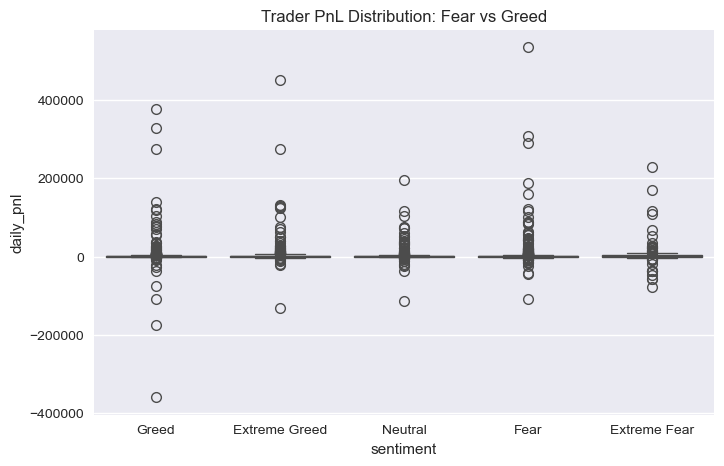

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x="sentiment", y="daily_pnl", data=merged)
plt.title("Trader PnL Distribution: Fear vs Greed")
plt.show()


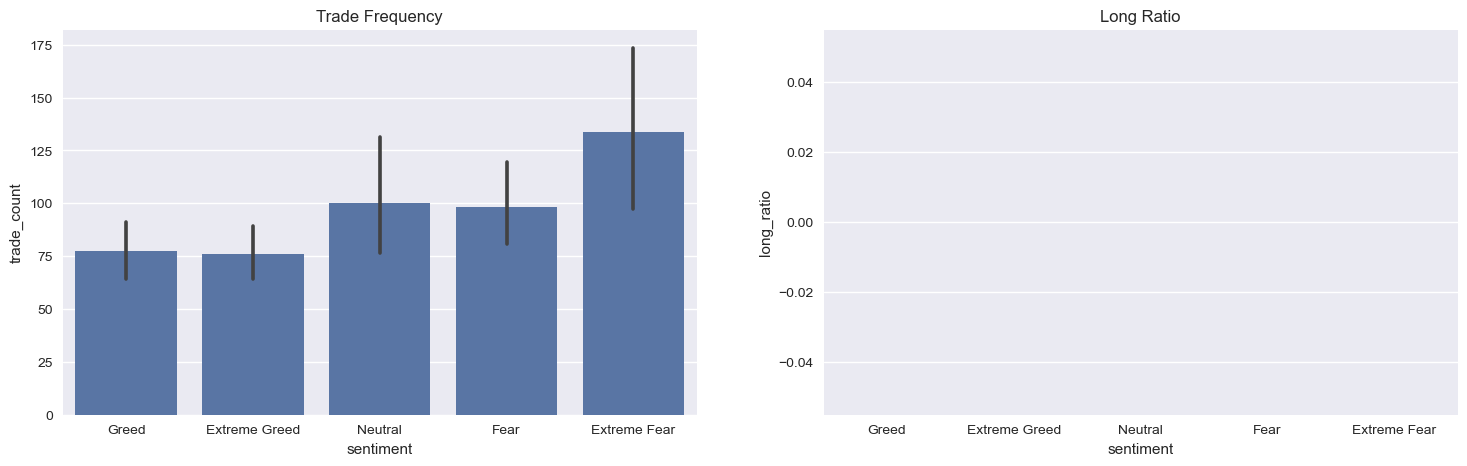

In [35]:
fig, axs = plt.subplots(1,2, figsize=(18,5))

sns.barplot(x="sentiment", y="trade_count", data=merged, ax=axs[0])
axs[0].set_title("Trade Frequency")

sns.barplot(x="sentiment", y="long_ratio", data=merged, ax=axs[1])
axs[1].set_title("Long Ratio")

plt.show()


In [37]:
merged["activity_segment"] = pd.qcut(merged["trade_count"], 3, labels=["Low","Medium","High"])
merged["profit_segment"] = pd.qcut(merged["daily_pnl"], 3, labels=["Weak","Moderate","Strong"])

segment_perf = merged.groupby(["activity_segment","sentiment"]).daily_pnl.mean()
segment_perf


C:\Users\Pritam\AppData\Local\Temp\ipykernel_2092\1383331622.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_perf = merged.groupby(["activity_segment","sentiment"]).daily_pnl.mean()


activity_segment  sentiment    
Low               Extreme Fear       209.518742
                  Extreme Greed      901.848011
                  Fear               766.892608
                  Greed             1115.667901
                  Neutral            407.690974
Medium            Extreme Fear      3176.850503
                  Extreme Greed     5942.896123
                  Fear              2850.575146
                  Greed             1339.773080
                  Neutral           2221.641720
High              Extreme Fear      7915.471187
                  Extreme Greed     8694.077598
                  Fear             13019.525703
                  Greed             8121.324680
                  Neutral           7610.462692
Name: daily_pnl, dtype: float64

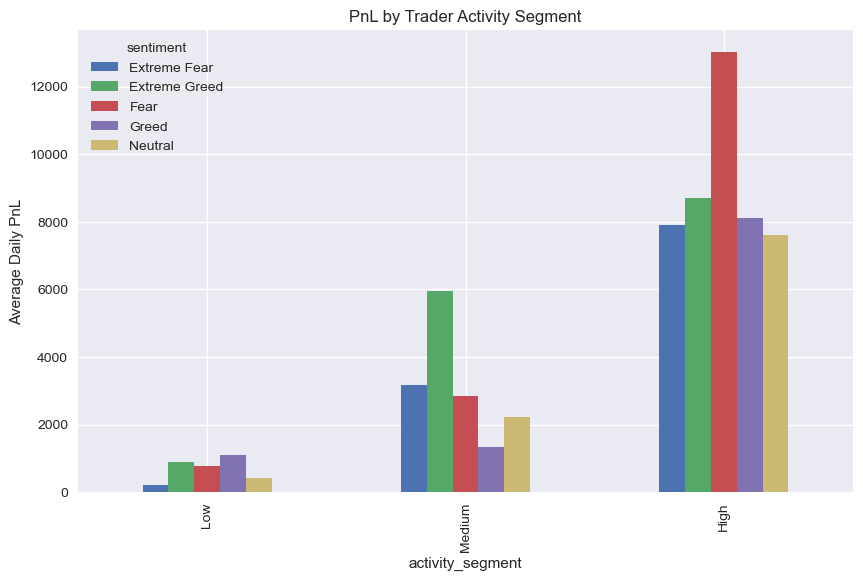

In [38]:
segment_perf.unstack().plot(kind="bar", figsize=(10,6))
plt.title("PnL by Trader Activity Segment")
plt.ylabel("Average Daily PnL")
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = merged.copy()
df["target"] = (df["daily_pnl"] > 0).astype(int)

features = ["trade_count","avg_trade_size","long_ratio"]

X = df[features]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.50      0.45      0.47       213
           1       0.70      0.74      0.72       373

    accuracy                           0.63       586
   macro avg       0.60      0.59      0.60       586
weighted avg       0.63      0.63      0.63       586

